In [1]:
using LimberJack
using NPZ
using LinearAlgebra
using Statistics

┌ Info: Precompiling LimberJack [6b86205d-155a-4b14-b82d-b6a149ea78f2]
└ @ Base loading.jl:1423


In [2]:
files = npzread("../emulator/files.npz")
training_cosmos = files["training_cosmos"]
training_Pks = files["training_Pks"]
hypers = files["hypers"]
alphas = files["alphas"]
k_arr = files["training_karr"];

In [3]:
cosmo1 = Cosmology(0.252, 0.039, 0.75, 1.0, 0.72,
                  nk=256, tk_mode="EisHu")
Pk_EisHu = lin_Pk(cosmo1, k_arr, 0.0)

40-element Vector{Float64}:
  1036.352240195552
  1379.1379759589909
  1834.888760669147
  2440.3015297790657
  3243.3246622160814
  4305.815200471618
  5706.006763969838
  7539.554648199361
  9916.63349093311
 12953.392675118284
 16751.330392794367
 21360.774506354075
 26727.011311880167
     ⋮
   901.3501617503766
   494.2312226823577
   265.6687469846625
   140.22672744985124
    72.81605124637993
    37.254193426012165
    18.807722922751967
     9.381691813544858
     4.629281799819311
     2.2619816192733295
     1.0956337783696153
     0.5265292770612819

In [4]:
cosmo2 = Cosmology(0.252, 0.039, 0.75, 1.0, 0.72,
                  nk=256, tk_mode="emulator")
Pk_emul_L = lin_Pk(cosmo2, k_arr, 0.0)

40-element Vector{Float64}:
  1050.960956284372
  1398.4032043171378
  1859.6622841403675
  2473.0530767865803
  3282.8790871294177
  4356.116673923508
  5764.046022786197
  7595.029820201878
  9978.86442097913
 13015.32672548952
 16810.02833105484
 21522.479088048512
 26914.242919359283
     ⋮
   906.439126111954
   500.45526790675103
   268.92655914017803
   141.51259719848974
    73.28322784791087
    37.26174261259644
    18.764465534099344
     9.557355398310062
     4.578391810028084
     2.228870891568425
     1.0781141217106835
     0.5165002452451282

In [5]:
ref = [1.05199810e+03, 1.39972787e+03, 1.86175310e+03, 2.47485290e+03,
       3.28678329e+03, 4.35879529e+03, 5.76807365e+03, 7.60883617e+03,
       9.99017257e+03, 1.30291073e+04, 1.68341153e+04, 2.14732641e+04,
       2.69244140e+04, 3.30028431e+04, 3.92692797e+04, 4.49267904e+04,
       4.87473257e+04, 4.91726610e+04, 4.49690394e+04, 3.67747863e+04,
       2.82780596e+04, 2.29757121e+04, 1.74933110e+04, 1.07923121e+04,
       7.73217085e+03, 4.73490310e+03, 2.81547163e+03, 1.63726622e+03,
       9.16888584e+02, 5.03788217e+02, 2.70399989e+02, 1.42297928e+02,
       7.35961443e+01, 3.74882941e+01, 1.88420637e+01, 9.35899651e+00,
       4.60024344e+00, 2.24010663e+00, 1.08184944e+00, 5.18425752e-01];

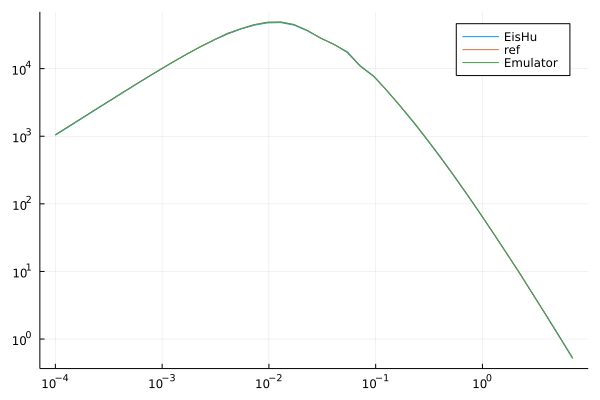

In [6]:
using Plots
plot(k_arr, Pk_EisHu, xaxis=:log, yaxis=:log, label="EisHu")
plot!(k_arr, ref, xaxis=:log, yaxis=:log, label="ref")
plot!(k_arr, Pk_emul_L, xaxis=:log, yaxis=:log, label="Emulator")

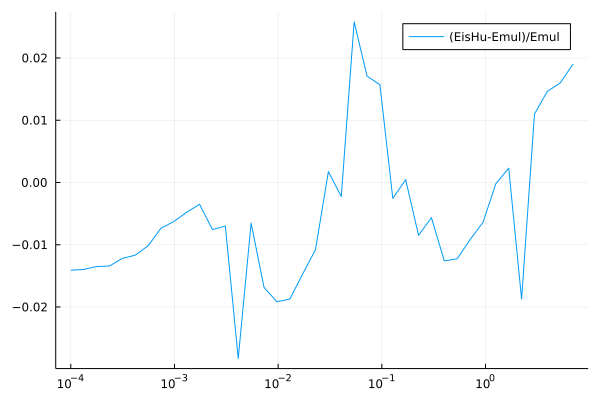

In [7]:
plot(k_arr, (Pk_EisHu-Pk_emul_L)./Pk_EisHu, xaxis=:log, label="(EisHu-Emul)/Emul")

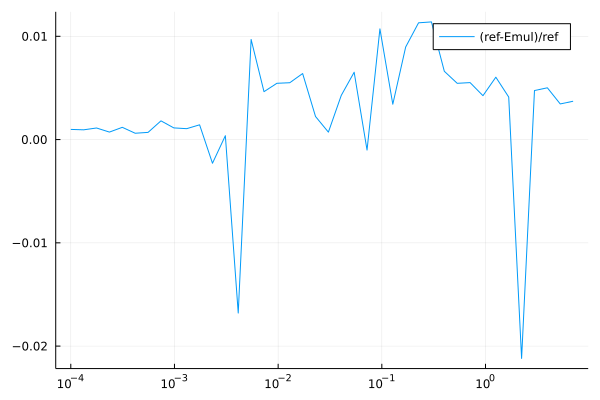

In [8]:
plot(k_arr, (ref-Pk_emul_L)./ref, xaxis=:log, label="(ref-Emul)/ref")

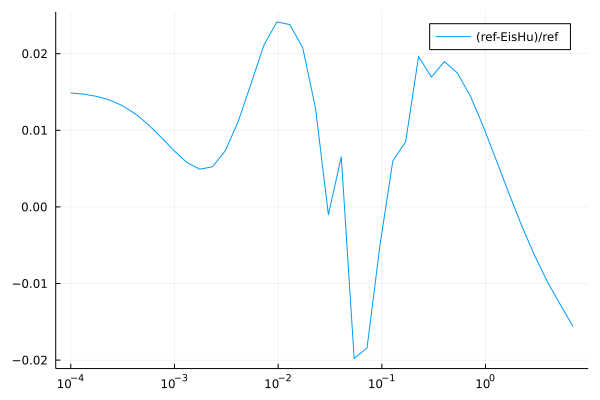

In [9]:
plot(k_arr, (ref-Pk_EisHu)./ref, xaxis=:log, label="(ref-EisHu)/ref")